# 1. Read the scoring file and create an RDD consisting of the parsed rows

In [6]:
from pyspark import SparkContext

sc = SparkContext()
ratings_rdd = sc.textFile("./dataset/ratings.csv")
header = ratings_rdd.first()

# 去除头部，然后解析每一行
ratings_rdd = ratings_rdd.filter(lambda line: line != header) \
    .map(lambda line: line.split(',')) \
    .map(lambda tokens: (tokens[0], tokens[1], float(tokens[2]), tokens[3]))

ratings_rdd

PythonRDD[3] at RDD at PythonRDD.scala:53

# 2. Number of statistical scores

In [8]:
num_ratings = ratings_rdd.count()

num_ratings

25000095

# 3. Recommended top 5 movies

In [11]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("MovieLens").getOrCreate()
ratings_df = spark.createDataFrame(ratings_rdd, ["userId", "movieId", "rating", "timestamp"])

# 计算每部电影的平均评分
avg_ratings_df = ratings_df.groupBy("movieId").avg("rating")

# 降序排列并选出前5部
top_movies = avg_ratings_df.orderBy("avg(rating)", ascending=False).limit(5)

top_movies.show()

+-------+-----------+
|movieId|avg(rating)|
+-------+-----------+
| 159048|        5.0|
| 195641|        5.0|
| 169820|        5.0|
| 169338|        5.0|
| 182345|        5.0|
+-------+-----------+



# 4. Other data analysis operations

In [ ]:
# You can perform more data analysis as needed, such as counting the number of ratings of different movies, user activity analysis, etc.

# 5. Create a visualization

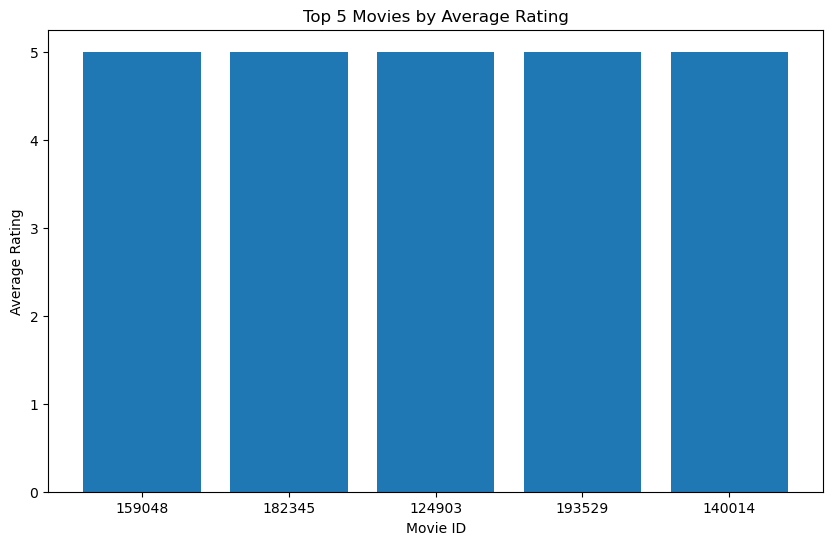

In [12]:
import matplotlib.pyplot as plt

# 以Pandas DataFrame的形式获取数据
top_movies_pd = top_movies.toPandas()

# 创建可视化
plt.figure(figsize=(10, 6))
plt.bar(top_movies_pd['movieId'], top_movies_pd['avg(rating)'])
plt.xlabel('Movie ID')
plt.ylabel('Average Rating')
plt.title('Top 5 Movies by Average Rating')
plt.show()